In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [593]:
df = pd.read_csv('train.csv')

In [594]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [595]:
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [597]:
df[df.Age.isna()]
age_median = df.Age.median()
df['Age'] = df.Age.fillna(age_median)
# also try using mean?

In [598]:
df[df.Embarked.isna()]
embarked_mode = df.Embarked.mode()
df['Embarked'] = df.Embarked.fillna(embarked_mode)
# also try dropping if embarked is important???

In [599]:
# df['Pclass'] = pd.to_string(df.Pclass, errors='coerce')
df['Pclass'] = df['Pclass'].astype(str)

In [600]:
# baseline is guess of non-survival
# or probability of survival based on whole pop, .38 = (342 / (342+549))

In [601]:
y = df.Survived
X = df.drop(columns=['Survived'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [602]:
X =pd.get_dummies(X)
# prob drop PassengerID and will need to drop one and dummy Sex, Embarked, Pclass
X = X.drop(columns=['Sex_female','Embarked_C','Pclass_1'])
X = sm.add_constant(X)
X.head()

,const,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.0,1,0,7.2500,0,1,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,0,0,1
4,1.0,35.0,0,0,8.0500,0,1,1,0,1


0    549
1    342
Name: Survived, dtype: int64

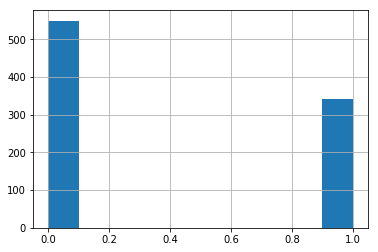

In [603]:
#df['Survived'].hist()
y.hist()
y.value_counts()

In [604]:
df.corr()['Survived'].sort_values()

Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [606]:
X_train.shape

(596, 10)

In [607]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     38.84
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           3.69e-54
Time:                        23:58:58   Log-Likelihood:                -273.13
No. Observations:                 596   AIC:                             566.3
Df Residuals:                     586   BIC:                             610.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0607      0.076     13.892      0.000       0.911       1.211
Age           -0.0040      0.001     -2.935      0.003      -0.007      -0.001
SibSp         -0.0337      0.015     -2.271      0.023      -0.063      -0.005
Parch         -0.0203      0.023     -0.872      0.384      -0.066       0.025
Fare           0.0006      0.000      1.615      0.107      -0.000       0.001
Pclass_2      -0.0339      0.056     -0.600      0.549      -0.145       0.077
Pclass_3      -0.2488      0.053     -4.714      0.000      -0.352      -0.145
Sex_male      -0.4913      0.035    -13.881      0.000      -0.561      -0.422
Embarked_Q    -0.0509      0.068     -0.743      0.458      -0.185       0.084
Embarked_S    -0.1261      0.044     -2.862      0.004      -0.213      -0.040
==============================================================================
Omnibus:                       32.662   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.901
Skew:                           0.608   Prob(JB):                     9.71e-09
Kurtosis:                       3.081   Cond. No.                         378.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [608]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [609]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [610]:
X_test.head()

,const,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
709,1.0,28.0,1,1,15.2458,0,1,1,0,0
439,1.0,31.0,0,0,10.5000,1,0,1,0,1
840,1.0,20.0,0,0,7.9250,0,1,1,0,1
720,1.0,6.0,0,1,33.0000,1,0,0,0,1
39,1.0,14.0,1,0,11.2417,0,1,0,0,0


In [611]:
model.score(X_test, y_test)

0.8067796610169492

In [612]:
# scatter_matrix(X);
X.columns

Index(['const', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [613]:
X = X.drop(columns=['Pclass_2', 'Pclass_3'])
X.head()

,const,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,1.0,35.0,0,0,8.0500,1,0,1


In [614]:
X =pd.get_dummies(X)
# prob drop PassengerID and will need to drop one and dummy Sex, Embarked, Pclass
X = sm.add_constant(X)
X.head()

,const,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.0,1,0,7.2500,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1
3,1.0,35.0,1,0,53.1000,0,0,1
4,1.0,35.0,0,0,8.0500,1,0,1


In [615]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [616]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     42.10
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           3.94e-48
Time:                        23:58:59   Log-Likelihood:                -291.45
No. Observations:                 596   AIC:                             598.9
Df Residuals:                     588   BIC:                             634.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8716      0.061     14.316      0.000       0.752       0.991
Age           -0.0020      0.001     -1.494      0.136      -0.005       0.001
SibSp         -0.0420      0.015     -2.754      0.006      -0.072      -0.012
Parch         -0.0331      0.024     -1.390      0.165      -0.080       0.014
Fare           0.0015      0.000      4.405      0.000       0.001       0.002
Sex_male      -0.5209      0.036    -14.432      0.000      -0.592      -0.450
Embarked_Q    -0.1391      0.069     -2.025      0.043      -0.274      -0.004
Embarked_S    -0.1363      0.045     -3.050      0.002      -0.224      -0.049
==============================================================================
Omnibus:                       25.798   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.434
Skew:                           0.535   Prob(JB):                     6.69e-07
Kurtosis:                       2.966   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [618]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [619]:
model.score(X_test, y_test)

0.8033898305084746

In [620]:
logitModel = sm.Logit(y_train, X_train)
logitModel_fit = logitModel.fit()
logitModel_fit.pvalues

Optimization terminated successfully.
         Current function value: 0.478634
         Iterations 6


const         8.193931e-07
Age           1.201037e-01
SibSp         4.293742e-03
Parch         1.026211e-01
Fare          1.949962e-04
Sex_male      1.307261e-28
Embarked_Q    6.099504e-02
Embarked_S    5.288578e-03
dtype: float64

In [621]:
X.columns

Index(['const', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [622]:
X = X.drop(columns=['Age', 'Fare', 'Embarked_Q', 'Embarked_S'])
X.head()

,const,SibSp,Parch,Sex_male
0,1.0,1,0,1
1,1.0,1,0,0
2,1.0,0,0,0
3,1.0,1,0,0
4,1.0,0,0,1


In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [624]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     80.57
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           1.02e-43
Time:                        23:58:59   Log-Likelihood:                -310.50
No. Observations:                 596   AIC:                             629.0
Df Residuals:                     592   BIC:                             646.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7630      0.032     23.732      0.000       0.700       0.826
SibSp         -0.0357      0.015     -2.342      0.020      -0.066      -0.006
Parch         -0.0200      0.024     -0.836      0.404      -0.067       0.027
Sex_male      -0.5538      0.036    -15.174      0.000      -0.625      -0.482
==============================================================================
Omnibus:                       22.278   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.206
Skew:                           0.491   Prob(JB):                     5.54e-06
Kurtosis:                       2.904   Cond. No.                         4.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [625]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [626]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [627]:
model.score(X_test, y_test)

0.7966101694915254

In [628]:
X = df.drop(columns=['Age', 'Fare', 'Embarked', 'Survived', 'Parch'])
X.head()

,Pclass,Sex,SibSp
0,3,male,1
1,1,female,1
2,3,female,0
3,1,female,1
4,3,male,0


In [629]:
X =pd.get_dummies(X)
X = sm.add_constant(X)
X.head()

,const,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1.0,1,0,0,1,0,1
1,1.0,1,1,0,0,1,0
2,1.0,0,0,0,1,1,0
3,1.0,1,1,0,0,1,0
4,1.0,0,0,0,1,0,1


In [630]:
X = X.drop(columns = ['Pclass_3', 'Sex_male'])

In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [632]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     78.63
Date:                Sat, 21 Jul 2018   Prob (F-statistic):           1.81e-53
Time:                        23:58:59   Log-Likelihood:                -285.38
No. Observations:                 596   AIC:                             580.8
Df Residuals:                     591   BIC:                             602.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1110      0.025      4.443      0.000       0.062       0.160
SibSp         -0.0298      0.013     -2.250      0.025      -0.056      -0.004
Pclass_1       0.2707      0.040      6.689      0.000       0.191       0.350
Pclass_2       0.1928      0.041      4.658      0.000       0.112       0.274
Sex_female     0.5118      0.034     14.935      0.000       0.444       0.579
==============================================================================
Omnibus:                       33.990   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.625   Prob(JB):                     3.75e-09
Kurtosis:                       3.017   Cond. No.                         4.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [633]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [634]:
survival_predict = model.predict(X_test)  #[:10]

In [635]:
model.score(X_test, y_test)

0.8135593220338984

In [636]:
X.columns

Index(['const', 'SibSp', 'Pclass_1', 'Pclass_2', 'Sex_female'], dtype='object')

In [637]:
# best combo of variables I've gotten so far based on model score is above, 
# including only siblings/spouses, passenger class, and sex